TABLE OF CONTENTS

I -
   - Problem / Data Set Information
   - Importing Libraries
   - Loading Data / Exploratory Data Analysis
   - Correlation between Numeric features
   - Correlation between Numeric features and target variable
   - Simple Distribution Plots for all Features
   - Relationship between categorical variables and target variable 
   - Visualization
   - Checking missing values in the Dataset
   - Handling missing values
   - Convert Categorical variables into Numerical

II -  Random forest
   - Train Test Split
   - Feature Scaling 
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Comparaison des courbes représentants les valeurs prédites et les valeurs réelles
   - Tracé de l'importance des features

III -  Decision tree
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Comparaison des courbes représentants les valeurs prédites et les valeurs réelles
   - Visualisation de l'arbre de décision
   - Tracé de l'importance des features

IV -  Gradient Boosting Tree
   - Entrainement du modele
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Comparaison des courbes représentants les valeurs prédites et les valeurs réelles

 V - Comparaison des performances

### Problem / Data Set Information

# Prédire avec random forest, decision tree, gradient boost le prix d'une voiture en fonction de ses caractéristiques techniques.

Le dataset comporte 205 observations pour 26 colonnes.  
La variable à expliquer est la colonne price.  
Les variables explicatives sont les suivantes :  

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.


### Importing Libraries

In [27]:
# Data Manipulation
import pandas as pd
import numpy as np
import category_encoders as ce

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Machine Learning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Stats
from scipy import stats

# Others
import warnings  
warnings.filterwarnings('ignore')
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import CooksDistance

### Loading Data / Exploratory Data Analysis

In [2]:
# Load data 
cols=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
      'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
      'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Affichage des 5 premieres lignes du data train
data_cars = pd.read_csv("imports-85.data", names=cols)
data_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Remplacer les valeurs manquantes notées dans le dataframe par '?' en NaN
data_cars = data_cars.replace('?', np.nan)
data_cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
# Nombre de lignes et de colonnes des data
data_cars.shape

(205, 26)

In [5]:
# Noms des attributs
data_cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# Types des variables
data_cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# Convert some categorical variable to numeric 
for variable in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm','price']:
    data_cars[variable] = pd.to_numeric(data_cars[variable])

In [8]:
# Infos sur le dataset
data_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
# Basic statistics on numeric features 
data_cars.describe()
# data.select_dtypes(exclude=["object"]).describe() # First, drop categorical variables then apply describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Correlation between Numeric features

In [10]:
# New dataframe to calculate correlation between numeric variables
corr_df = data_cars.copy()
# corr_df = data.drop(['y'], axis=1, inplace=False).select_dtypes(exclude=["object"])
#cor= corr_df.corr(method='pearson')
#print(cor)

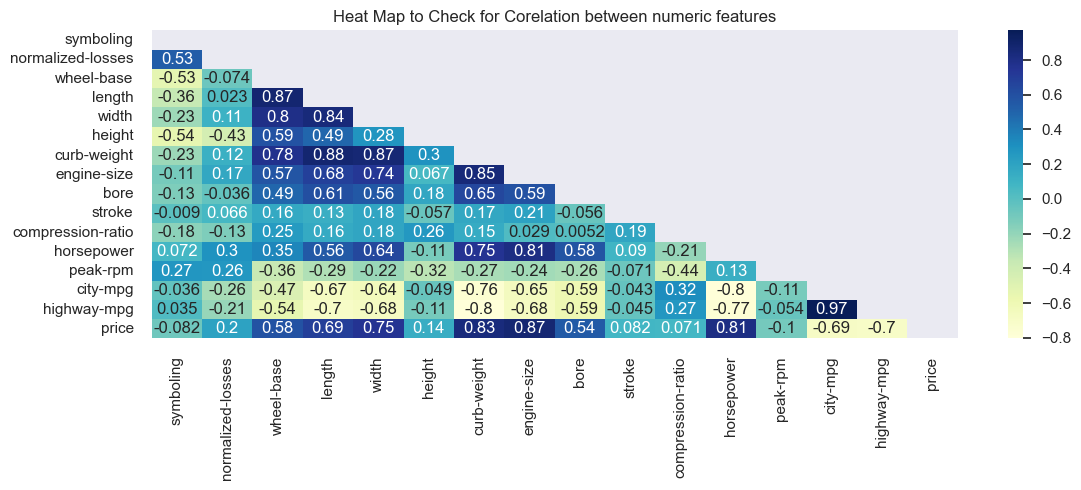

In [11]:
# Heat Map to Check for Corelation between numeric features
plt.figure(figsize=(13, 4)) # Augmenter figsize en cas de problème de visualisation
mask = np.triu(np.ones_like(corr_df.corr(method='pearson')))
sns.set(rc = {'figure.figsize':(26, 24)})
sns.heatmap(corr_df.corr(method='pearson'), cmap="YlGnBu", annot=True, mask=mask)
plt.title("Heat Map to Check for Corelation between numeric features");

### Correlation between Numeric features and target variable

In [12]:
# NOTE : 'price' represents the target variable
abs(corr_df.corr(method='pearson').loc['price']).sort_values()


compression-ratio    0.071107
stroke               0.082310
symboling            0.082391
peak-rpm             0.101649
height               0.135486
normalized-losses    0.203254
bore                 0.543436
wheel-base           0.584642
city-mpg             0.686571
length               0.690628
highway-mpg          0.704692
width                0.751265
horsepower           0.810533
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

### Simple Distribution Plots for all Features

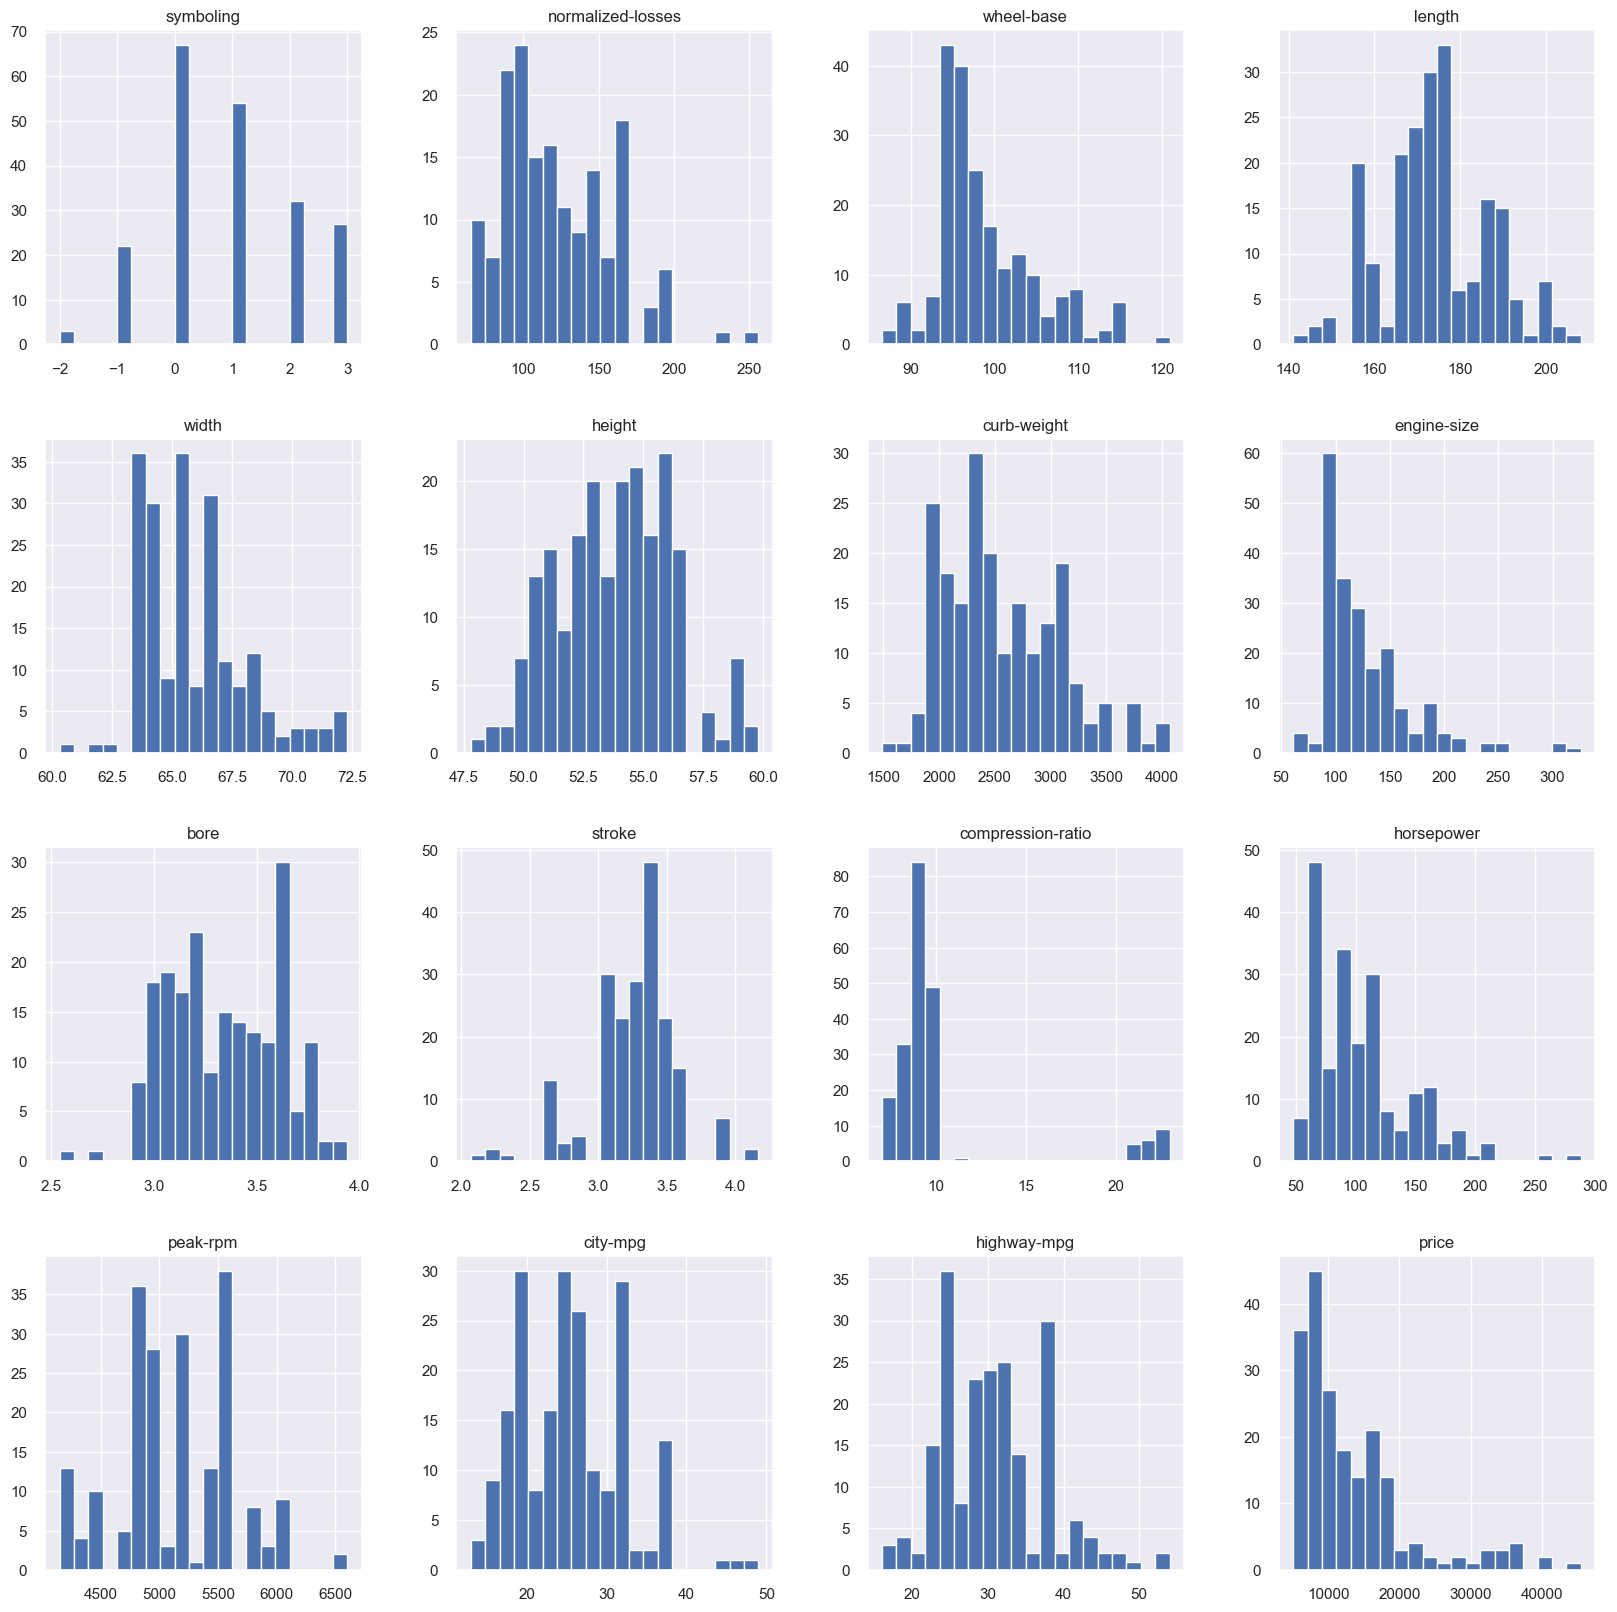

In [13]:
plt.rcParams["figure.figsize"] = (20, 20)
data_cars.hist(bins=20)
plt.show()

### Checking missing values in the Dataset

In [14]:
# Let's check which features contain missing values
pd.isnull(data_cars).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Sept features have missing values

### Handling Missing Values

In [15]:
# Drop rows that have a missing value in the 'price' column (target variable)
data_cars.dropna(subset=['price'], inplace=True)

In [16]:
# Let's replace NaN by 0 in column 'normalized-losses']
data_cars['normalized-losses']=data_cars['normalized-losses'].fillna(0)

In [17]:
# Filling 'num-of-doors'
data_cars['num-of-doors'].fillna(value=stats.mode(data_cars['num-of-doors'])[0][0], inplace=True)

In [18]:
# Filling 'bore', 'stroke', 'horsepower', 'peak-rpm' by their average respectively
for variable in ['bore', 'stroke', 'horsepower', 'peak-rpm',]:
    data_cars[variable].fillna(value=data_cars[variable].mean(), inplace=True)


In [19]:
# Checking missing values after processing
pd.isnull(data_cars).sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Convert Categorical variables into Numerical

In [20]:
# Convert Categorical variables into Numerical
encoder = ce.OrdinalEncoder(cols=data_cars.select_dtypes(include=["object"]).columns)

data_cars = encoder.fit_transform(data_cars)

data_cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,1,1,1,1,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,0.0,1,1,1,1,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,0.0,1,1,1,1,2,1,1,94.5,...,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,2,1,1,2,3,2,1,99.8,...,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,2,1,1,2,3,3,1,99.4,...,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,22,1,1,2,3,1,1,109.1,...,141,1,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,22,1,2,2,3,1,1,109.1,...,141,1,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,22,1,1,2,3,1,1,109.1,...,173,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,22,2,2,2,3,1,1,109.1,...,145,7,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# II -  Random forest

#### Train Test Split

In [21]:
X = data_cars.drop(['price'], axis = 1, inplace = False)
y = data_cars['price']

# Data train (X_train, y_train) and data test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### Feature Scaling 

Empty part

###  Entrainement du modele

In [97]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
param_grid_rf_reg = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], #, 1300], # On pourrait utiliser np.arange() pour plus de valeurs
    #"bootstrap": [True, False],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70],  # On pourrait utiliser np.arange() pour plus de valeurs
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], # On pourrait utiliser np.arange() pour plus de valeurs
    'max_features': ['auto', 'sqrt'], #'log2'],
    'max_depth' : [2, 3, 4, 5, 6], # On pourrait utiliser np.arange() pour plus de valeurs
    'criterion' :['squared_error'] #,'friedman_mse', 'mae']
}

rf_reg=RandomForestRegressor(random_state=42, bootstrap=True, n_jobs=-1)

# Grid Search to Search through all the combination of values
CV_rf_reg = GridSearchCV(
    estimator=rf_reg, 
    param_grid=param_grid_rf_reg, 
    # scoring='neg_mean_squared_error', #  il calcule l'accuracy
    #  error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [98]:
# Entrainement du modèle
CV_rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=2)

In [99]:
# To view all the parameters used
CV_rf_reg.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=2)>

In [100]:
# We can view the best parameters from fitting the grid search:
print(CV_rf_reg.best_params_) 

{'criterion': 'squared_error', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


In [ ]:
# print(CV_rf_reg.best_score_)
# print(CV_rf_reg.cv_results_)

###  Evaluation du modele

In [22]:
# Now let's run the model with this parameters
random_forest_reg = RandomForestRegressor(
    n_estimators=800,
    criterion='squared_error',
    bootstrap=True,
    oob_score=True,
    random_state=123,
    max_depth=6,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_jobs=-1
)

random_forest_reg.fit(X_train, y_train)
y_predicted_reg = random_forest_reg.predict(X_test)

# R2 score du data test avec le random forest
print("R2 random forest (data test): {}.".format(r2_score(y_test, y_predicted_reg)))

# provides the coefficient of determination using oob method, i.e. on 'unseen' out-of-bag data.
print("R2 oob score: {}.".format(random_forest_reg.oob_score_)) 


R2 random forest (data test): 0.8899997529740716.
R2 oob score: 0.923263320254859.


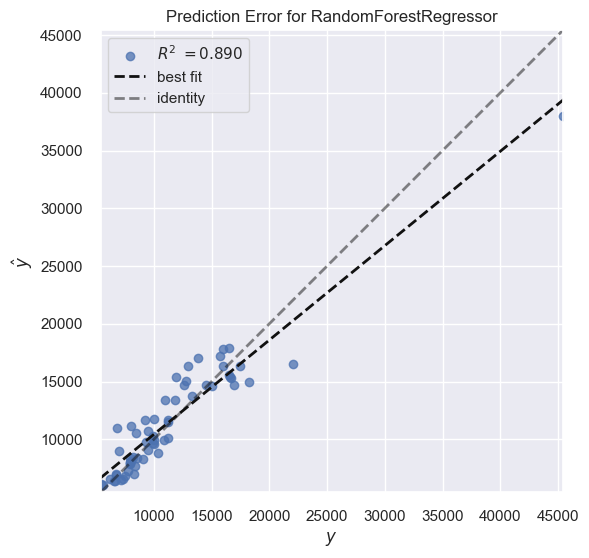

In [33]:
# Prediction Error for Random forest
plt.figure(figsize=(8, 6))
visualizer = PredictionError(random_forest_reg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)      
visualizer.show(); 

### Evaluation avec d'autres métriques

In [23]:
mse_test_rf = mean_squared_error(y_test, y_predicted_reg)
rmse_test_rf = mse_test_rf**.5

mae_test_rf = mean_absolute_error(y_test, y_predicted_reg)

r2_test_rf = r2_score(y_test, y_predicted_reg)


model_results_random_forest = pd.DataFrame([['Random Forest', rmse_test_rf, mae_test_rf, r2_test_rf]],
                             columns = ['Model', 'RMSE', 'MAE', 'R2'])
model_results_random_forest

,Model,RMSE,MAE,R2
0,Random Forest,1914.008332,1300.345417,0.89


### Comparaison des courbes représentants les valeurs prédites et les valeurs réelles

In [34]:
# Creating trace1
trace1 = go.Scatter(
    x = [i for i in range(1,len(y_test)+1)],
    y = y_predicted_reg,
    mode = "lines+markers",
    name = "courbe prédite",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))#,
    #text= df.university_name)

# Creating trace2
trace2 = go.Scatter(
    x = [i for i in range(1,len(y_test)+1)],
    y = y_test,
    mode = "lines+markers",
    name = "courbe réelle",
    marker = dict(color = 'rgba(80, 26, 80, 0.8)')) #,
    #text= df.university_name)

trace = [trace1, trace2]
layout = dict(title = '',
              xaxis= dict(title= 'observations',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'biomasse moléculaire microbienne',ticklen= 5,zeroline= False)
             )
fig = dict(data = trace, layout = layout)
iplot(fig)

### Tracé de l'importance des features

In [103]:
# Dataframe Features importances
df_feat = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : random_forest_reg.feature_importances_})

df_feat.sort_values(by=['Features_importances'], ascending=False, inplace=True)
df_feat

,Features,Features_importances
16,engine-size,0.672694
13,curb-weight,0.164995
24,highway-mpg,0.061609
21,horsepower,0.020583
11,width,0.013008
9,wheel-base,0.007755
20,compression-ratio,0.007033
2,make,0.007018
10,length,0.006442
1,normalized-losses,0.006096


Text(0, 0.5, 'Feature names')

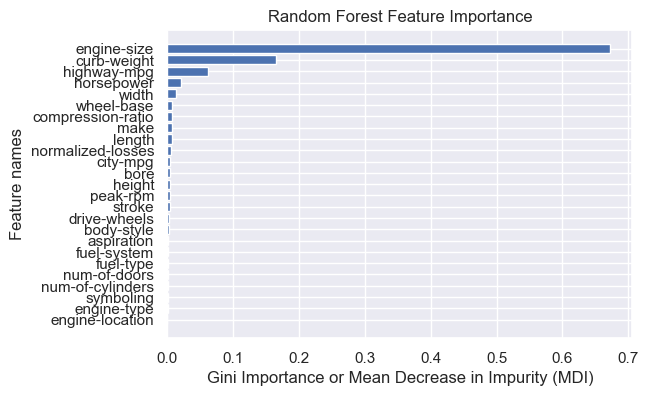

In [104]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat['Features'], df_feat['Features_importances'])
plt.title("Random Forest Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

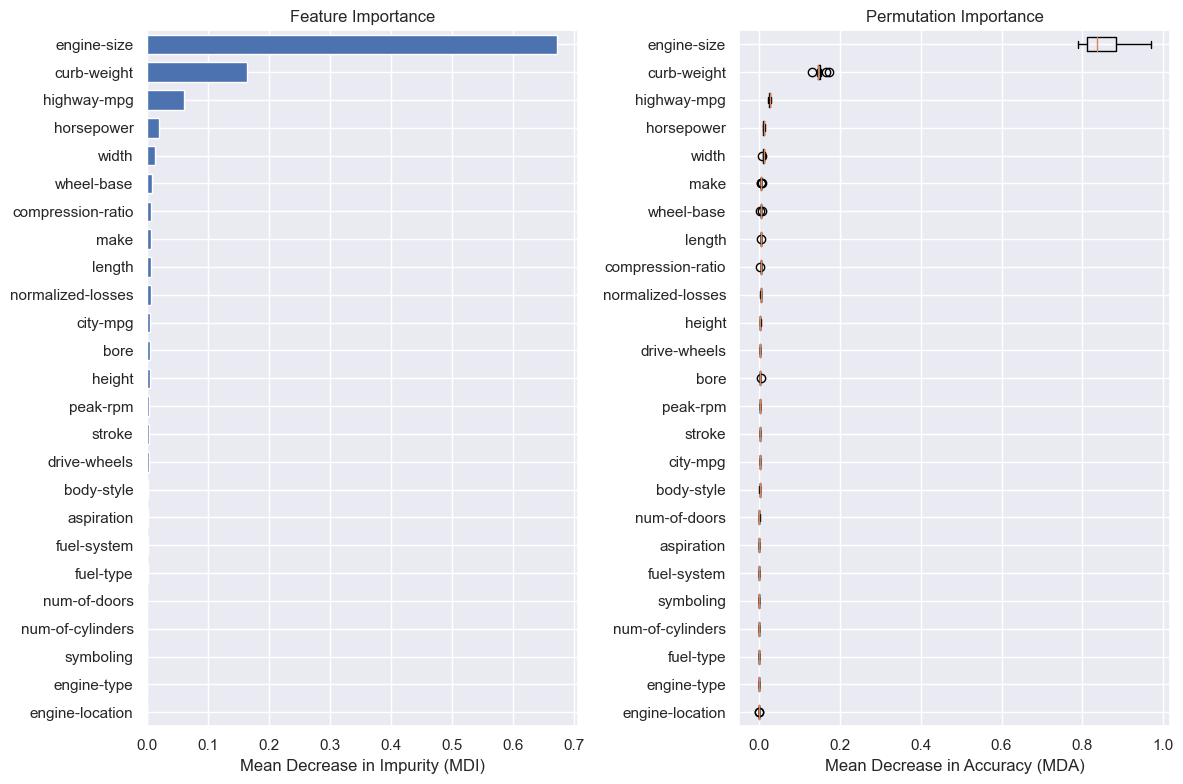

In [105]:
# Feature Importance (MDI) vs Generate Permutation Importance plot
result = permutation_importance(random_forest_reg, X_train, y_train, n_repeats=10, random_state=42)
# n_repeats : Number of times to permute a feature.
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(random_forest_reg.feature_importances_)
tree_indices = np.arange(0, len(random_forest_reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, random_forest_reg.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(random_forest_reg.feature_importances_)))
ax1.set_xlabel('Mean Decrease in Impurity (MDI)')
ax1.set_title('Feature Importance')

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])
ax2.set_xlabel('Mean Decrease in Accuracy (MDA)')
ax2.set_title('Permutation Importance')

fig.tight_layout()
plt.show()

# III -  Decision tree

###  Entrainement du modele

In [106]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
param_grid_dt_reg = { 
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70],  # On pourrait utiliser np.arange() pour plus de valeurs
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], # On pourrait utiliser np.arange() pour plus de valeurs
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], # On pourrait utiliser np.arange() pour plus de valeurs
    'criterion' :['squared_error'] #,'friedman_mse', 'mae']
}

dt_reg=DecisionTreeRegressor(random_state=42, splitter='best')

# Grid Search to Search through all the combination of values
CV_dt_reg = GridSearchCV(
    estimator=dt_reg, 
    param_grid=param_grid_dt_reg, 
    # scoring='neg_mean_squared_error', 
    #  error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [107]:
# Entrainement du modèle
CV_dt_reg.fit(X_train, y_train)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]},
             verbose=2)

In [108]:
# To view all the parameters used
CV_dt_reg.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]},
             verbose=2)>

In [109]:
# We can view the best parameters from fitting the grid search:
print(CV_dt_reg.best_params_) 

{'criterion': 'squared_error', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [110]:
# print(CV_dt_reg.best_score_)
# print(CV_dt_reg.cv_results_)

###  Evaluation du modele

In [29]:
# Now let's run the model with this parameters
model_tree = DecisionTreeRegressor(
    criterion='squared_error',
    random_state=123,
    max_depth=8,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2
)
# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_tree.fit(X_train, y_train)
# Prédiction avec les données test
y_predicted_dt_reg = model_tree.predict(X_test)

# R2 score du data test avec la decision tree 
print("R2 decision tree (data test): {}.".format(r2_score(y_test, y_predicted_dt_reg)))

R2 decision tree (data test): 0.8631052476015972.


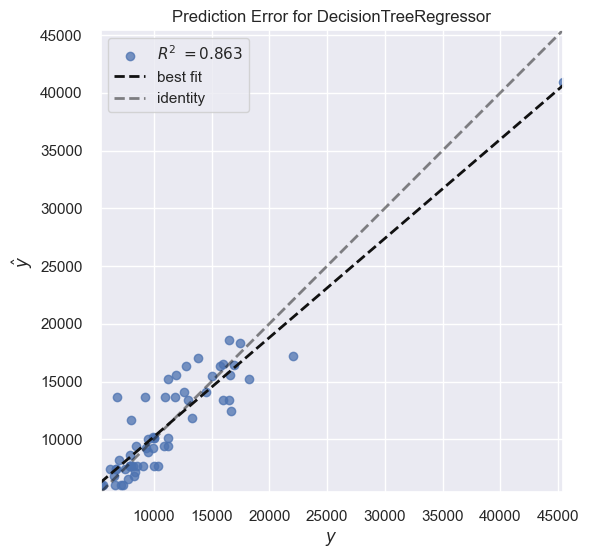

In [35]:
# Prediction Error for Random forest
plt.figure(figsize=(8, 6))
visualizer = PredictionError(model_tree)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)      
visualizer.show(); 

### Evaluation avec d'autres métriques

In [64]:
mse_test_dt = mean_squared_error(y_test, y_predicted_dt_reg)
rmse_test_dt = mse_test_dt**.5

mae_test_dt = mean_absolute_error(y_test, y_predicted_dt_reg)

r2_test_dt = r2_score(y_test, y_predicted_dt_reg)


model_results_decision_tree = pd.DataFrame([['Decision tree', rmse_test_dt, mae_test_dt, r2_test_dt]],
                             columns = ['Model', 'RMSE', 'MAE', 'R2'])
model_results_decision_tree

,Model,RMSE,MAE,R2
0,Decision tree,2135.209013,1554.903132,0.863105


### Comparaison des courbes représentants les valeurs prédites et les valeurs réelles

In [36]:
# Creating trace1
trace1 = go.Scatter(
    x = [i for i in range(1,len(y_test)+1)],
    y = y_predicted_dt_reg,
    mode = "lines+markers",
    name = "courbe prédite",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))#,
    #text= df.university_name)

# Creating trace2
trace2 = go.Scatter(
    x = [i for i in range(1,len(y_test)+1)],
    y = y_test,
    mode = "lines+markers",
    name = "courbe réelle",
    marker = dict(color = 'rgba(80, 26, 80, 0.8)')) #,
    #text= df.university_name)

trace = [trace1, trace2]
layout = dict(title = '',
              xaxis= dict(title= 'observations',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'biomasse moléculaire microbienne',ticklen= 5,zeroline= False)
             )
fig = dict(data = trace, layout = layout)
iplot(fig)

### Visualisation de l'arbre de décision

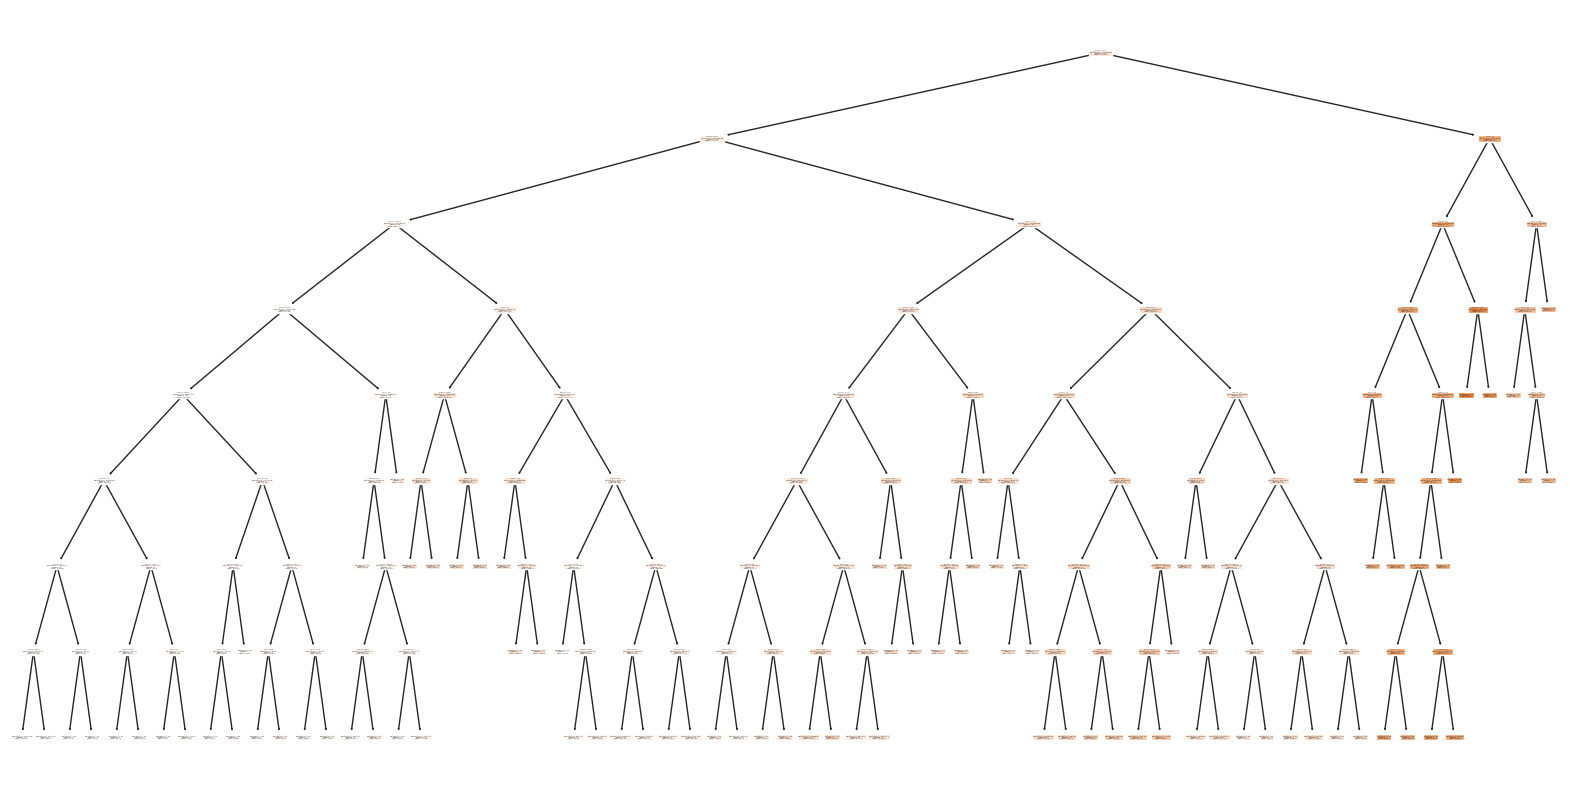

In [120]:
plt.figure(figsize=(20,10))
plot_tree(model_tree, filled=True)
plt.savefig('decision_tree.png')
plt.show()

# IV -  Gradient Boosting Tree

###  Entrainement du modele

In [50]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning

# Remarque :
    # - criteron: type de paramètre utilisé pour diviser les noeuds des arbre 
    # - loss: fonction cout (erreur entre reelle et prédite) à optimiser qui controle le nombre d'arbre de la foret 

param_grid_gbt = {
    'criterion' :['squared_error'], #,'friedman_mse', 'mae']
    'loss': ['absolute_error', 'squared_error'], # 'huber', 'quantile']
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], # 0.0002, 0.002, 0.02, 0.2, 0.0003, 0.003, 0.03, 0.3, ...., 0.0009, 0.009, 0.09, 0.9, 
    'n_estimators' : [100, 250, 500, 750, 1000, 1250, 1500, 1750],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'max_features': ['auto'], #'sqrt', 'log2'],
    #'min_samples_leaf' : peu d'interet pour la création de la foret, on le laisse par défaut
    #'min_samples_split' : peu d'interet pour la création de la foret, on le laisse par defaut 
    'subsample': [1]  # [0.7], 
    }

gbt = GradientBoostingRegressor(random_state=42)

# Grid Search to Search through all the combination of values
CV_gbt = GridSearchCV(
    estimator=gbt, 
    param_grid=param_grid_gbt, 
    # scoring='neg_mean_squared_error', #
    #  error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [51]:
# Entrainement du modèle
CV_gbt.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['absolute_error', 'squared_error'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto'],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750],
                         'subsample': [1]},
             verbose=2)

In [52]:
# To view all the parameters used
CV_gbt.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['absolute_error', 'squared_error'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto'],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750],
                         'subsample': [1]},
             verbose=2)>

In [53]:
# We can view the best parameters from fitting the grid search:
print(CV_gbt.best_params_) 

{'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 1000, 'subsample': 1}


In [54]:
# print(CV_gbt.best_score_)
# print(CV_gbt.cv_results_)

###  Evaluation du modele

In [37]:
# Now let's run the model with this parameters
model_gbt = GradientBoostingRegressor(
    criterion='squared_error',
    loss='absolute_error',
    learning_rate=0.01,
    n_estimators = 1000,
    random_state=42,
    max_depth=8,
    max_features='auto',
    subsample = 1 # [0.7]
    #'min_samples_leaf' : peu d'interet pour la création de la foret, on le laisse par défaut
    #'min_samples_split' : peu d'interet pour la création de la foret, on le laisse par defaut  
)
# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_gbt.fit(X_train, y_train)
# Prédiction avec les données test
y_predicted_gbt = model_gbt.predict(X_test)

# R2 score du data test avec le GradientBoostingRegressor
print("R2 Gradient Boost (data test): {}.".format(r2_score(y_test, y_predicted_gbt)))

R2 Gradient Boost (data test): 0.8850791862663235.


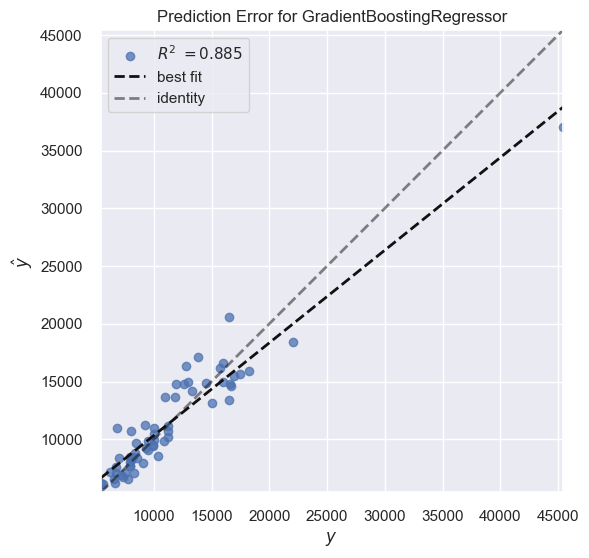

In [38]:
# Prediction Error for GradientBoostingRegressor
plt.figure(figsize=(8, 6))
visualizer = PredictionError(model_gbt)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 


### Evaluation avec d'autres métriques

In [60]:
mse_test_gbt = mean_squared_error(y_test, y_predicted_gbt)
rmse_test_gbt = mse_test_gbt**.5

mae_test_gbt = mean_absolute_error(y_test, y_predicted_gbt)

r2_test_gbt = r2_score(y_test, y_predicted_gbt)


model_results_gradient_boost = pd.DataFrame([['Gradient Boost', rmse_test_gbt, mae_test_gbt, r2_test_gbt]],
                             columns = ['Model', 'RMSE', 'MAE', 'R2'])
model_results_gradient_boost 

,Model,RMSE,MAE,R2
0,Gradient Boost,1956.349033,1351.009236,0.885079


### Comparaison des courbes représentants les valeurs prédites et les valeurs réelles

In [39]:
# Creating trace1
trace1 = go.Scatter(
    x = [i for i in range(1,len(y_test)+1)],
    y = y_predicted_gbt,
    mode = "lines+markers",
    name = "courbe prédite",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))#,
    #text= df.university_name)

# Creating trace2
trace2 = go.Scatter(
    x = [i for i in range(1,len(y_test)+1)],
    y = y_test,
    mode = "lines+markers",
    name = "courbe réelle",
    marker = dict(color = 'rgba(80, 26, 80, 0.8)')) #,
    #text= df.university_name)

trace = [trace1, trace2]
layout = dict(title = '',
              xaxis= dict(title= 'observations',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'biomasse moléculaire microbienne',ticklen= 5,zeroline= False)
             )
fig = dict(data = trace, layout = layout)
iplot(fig)


# V -  Comparaison des performances des modèles

In [68]:
# score obtenu sur le meme data test avec différents modèles
scores = pd.DataFrame({'modèles': ['Random forest', 'Decision Tree', 'Gradient Boost'], 
                         'R2 score': [r2_test_rf, r2_test_dt, r2_test_gbt]})
scores

,modèles,R2 score
0,Random forest,0.890000
1,Decision Tree,0.863105
2,Gradient Boost,0.885079
